In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [8]:
import numpy as np 
import pandas as pd

In [9]:
df = pd.read_csv('../input/credit-card-approval-prediction/application_record.csv',header=0)
df 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [10]:
df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [11]:
df.isnull().sum(axis=0)


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [12]:
df.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()

OCCUPATION_TYPE
Accountants              15985
Cleaning staff            5845
Cooking staff             8076
Core staff               43007
Drivers                  26090
HR staff                   774
High skill tech staff    17289
IT staff                   604
Laborers                 78240
Low-skill Laborers        2140
Managers                 35487
Medicine staff           13520
Private service staff     3456
Realty agents             1041
Sales staff              41098
Secretaries               2044
Security staff            7993
Waiters/barmen staff      1665
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
df_clean = df.dropna(axis = 0)



In [14]:
df_clean_drop = df_clean.drop(['CODE_GENDER','DAYS_BIRTH', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_MOBIL'],axis = 1)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [15]:
df_clean_drop.isnull().any()


ID                     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_EMPLOYED          False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [16]:
df_clean_drop.dtypes

ID                       int64
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [17]:
df_clean_drop['FLAG_OWN_CAR']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['FLAG_OWN_REALTY']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['NAME_INCOME_TYPE']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['NAME_EDUCATION_TYPE']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['NAME_FAMILY_STATUS']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['NAME_HOUSING_TYPE']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]
df_clean_drop['OCCUPATION_TYPE']= pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]



In [18]:
df_clean_drop.dtypes

ID                       int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [19]:
df_clean_drop

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,0,0,0,112500.0,0,0,0,0,-1134,0,2.0
3,5008808,1,1,0,270000.0,1,1,1,1,-3051,1,1.0
4,5008809,1,1,0,270000.0,1,1,1,1,-3051,1,1.0
5,5008810,1,1,0,270000.0,1,1,1,1,-3051,1,1.0
6,5008811,1,1,0,270000.0,1,1,1,1,-3051,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,3,3,0,202500.0,3,3,3,3,-2309,3,2.0
438548,6839936,3,3,1,135000.0,3,3,3,3,-2095,3,3.0
438553,6840222,3,3,0,103500.0,3,3,3,3,-3007,3,1.0
438554,6841878,1,1,0,54000.0,1,1,1,1,-372,1,1.0


# **** Y

In [20]:
df_label = pd.read_csv('../input/credit-card-approval-prediction/credit_record.csv',header=0)
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [21]:
df_label.groupby('ID')['STATUS'].count()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: STATUS, Length: 45985, dtype: int64

In [22]:
df_label['STATUS'], labels  = pd.factorize(df_label['STATUS'])

In [23]:
labels

Index(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype='object')

In [24]:
df_label_clean = df_label[df_label['STATUS'] != 0]
df_label_clean

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
5,5001712,-1,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [25]:
df_label_clean['STATUS'][df_label['STATUS'] > 2] = 10


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [26]:
df_label_clean['STATUS'][df_label['STATUS'] <= 2] = 0


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [27]:
df_label_clean.groupby('STATUS')['STATUS'].count()

STATUS
0     825151
10     14194
Name: STATUS, dtype: int64

In [28]:
df_label_group = df_label_clean.groupby('ID').mean()

In [29]:
df_label_group['STATUS'][df_label_group['STATUS'] > 0] = 1
df_label_group['STATUS'][df_label_group['STATUS'] <= 0] = 0


In [30]:
df_label_group.groupby('STATUS')['STATUS'].count()

STATUS
0.0    36099
1.0     5350
Name: STATUS, dtype: int64

In [31]:
client_id = df_label_group.index.values
client_label = df_label_group['STATUS'].values

In [32]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [33]:
X_clien_id = df_clean_drop['ID'].values
df_clean_drop = df_clean_drop.drop(['ID'], axis = 1)

In [34]:
X = df_clean_drop.values
X.shape

(304354, 11)

In [35]:
real_client_id = [item for item in X_clien_id if item in client_id]

In [36]:
y = np.array([client_label[np.where(client_id == item)][0] for item in real_client_id])

In [37]:
X_final = [X[np.where(X_clien_id == item), :][0] for item in real_client_id] 

In [38]:
X_real_final = np.vstack(X_final)

In [39]:
X_real_final.shape

(22737, 11)

In [40]:
len(y)

22737

In [41]:
sum(y==0)

19648

In [42]:
sum(y==1)

3089

# Imbalance Problem !!


In [57]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=0)
X_res, y_res = sm.fit_resample(X_real_final, y)

In [58]:
X_res.shape

(6178, 11)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Model

#  - LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 8}
10CV accuracy : 50.54392021480629


In [63]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 51.05177993527508


# - Deep Learning


In [74]:
import tensorflow as tf

In [126]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(1000, activation='relu', input_shape=(11,)),
tf.keras.layers.Dense(500 ,activation='relu'),
tf.keras.layers.Dense(400, activation='relu'),   
tf.keras.layers.Dense(50, activation='relu'),
tf.keras.layers.Dense(10, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              12000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 733,471
Trainable params: 733,471
Non-trainable params: 0
__________________________________________________

In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Train Model



In [128]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 550, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

Train on 3953 samples, validate on 989 samples
3953/3953 [==============================] - 1s 159us/sample - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5076
Train on 3953 samples, validate on 989 samples
3953/3953 [==============================] - 0s 58us/sample - loss: 0.6938 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.4944
Train on 3953 samples, validate on 989 samples
3953/3953 [==============================] - 0s 58us/sample - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6931 - val_accuracy: 0.5116
Train on 3953 samples, validate on 989 samples
3953/3953 [==============================] - 0s 57us/sample - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4995
Train on 3953 samples, validate on 989 samples
3953/3953 [==============================] - 0s 58us/sample - loss: 0.6930 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5106
Train on 3953 samples, validate on 989 samples
3953/3953 [==========================

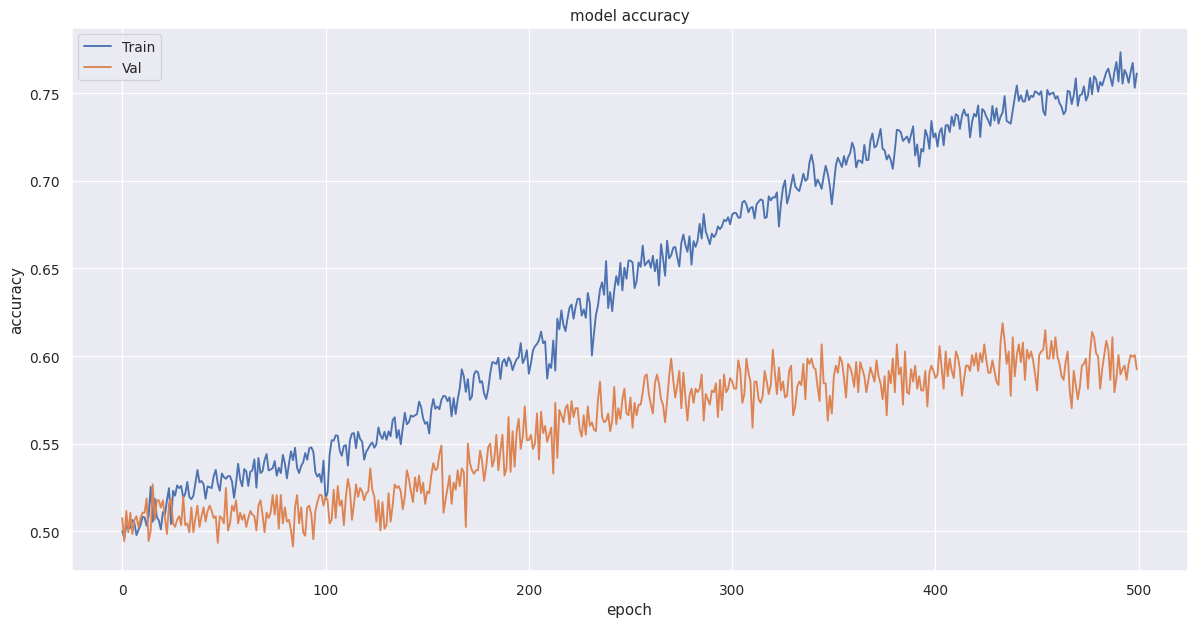

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [131]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.6043689320388349